In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [2]:
data=pd.read_csv("D:/onkar_cdac/C-DAC/PML/PML/Files_by_sir/5. PML/1. Day wise Study Material/Cases/Medical Cost Personal/insurance.csv")

In [3]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [5]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
dum_data = pd.get_dummies(data, drop_first=True)

X = dum_data.drop('charges', axis=1)
y = dum_data['charges']

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,
                                               random_state=2023)

In [8]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(936, 8) (402, 8) (936,) (402,)


## Linear Regression

In [9]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [10]:
pred_lr = lr.predict(X_test)
print(pred_lr)

[ 1.17360315e+04  1.14756849e+04  2.69274724e+04  7.24776879e+03
  7.68573559e+03  4.96387026e+03  7.11261515e+03  2.24481244e+03
  1.16647919e+04  3.33207530e+04  1.21743898e+04  3.33399985e+04
  4.02055211e+04  3.22186961e+04  7.13278606e+03  4.00841487e+04
  1.03182024e+04  1.11376111e+04  4.36085667e+03  3.46044872e+03
  2.72985447e+04  2.68809699e+03  6.04938043e+03  2.45291810e+03
  2.46633535e+03  8.88846940e+03  2.90828546e+04  1.16414539e+04
  3.74486224e+04  1.39126620e+04  8.64054404e+03  3.86218991e+02
  2.64488395e+04  4.83116808e+03  1.09684769e+04  3.39271741e+04
  9.79609804e+03  3.03771689e+04  1.17983243e+04  8.21370140e+03
  8.64753832e+03  7.99453882e+03  2.36530646e+03  7.50764727e+03
  3.10960784e+04  1.26543587e+04  8.63232018e+03  1.09469326e+04
  5.77457314e+03  1.27501346e+04  4.01163147e+03  2.56749581e+04
  3.72259732e+04  1.29921993e+04  1.01477544e+04  2.68798411e+04
  5.78064607e+03  1.39646396e+04 -3.49814127e+01  9.65934550e+03
  3.29086619e+03  1.03317

In [11]:
mse_lr = sklearn.metrics.mean_squared_error(y_test,pred_lr,squared=False)

In [12]:
mse_lr

5909.953805885106

In [13]:
dum_data

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


## Naive Bayes

In [14]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [15]:
sonar=pd.read_csv("D:/onkar_cdac/C-DAC/PML/PML/Files_by_sir/5. PML/1. Day wise Study Material/Cases/Sonar/Sonar.csv")

In [16]:
sonar

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [17]:
sonar['Class'].unique()

array(['R', 'M'], dtype=object)

In [18]:
dum_sonar=pd.get_dummies(sonar,drop_first=True)

In [19]:
dum_sonar

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class_R
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,0
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,0
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,0
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,0


In [20]:
X = dum_sonar.drop('Class_R',axis=1)
y=dum_sonar['Class_R']

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,
                                               random_state=2023)

In [22]:
gr=GaussianNB()
gr.fit(X_train,y_train)

GaussianNB()

In [23]:
pred = gr.predict(X_test)

In [24]:
pred

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0],
      dtype=uint8)

In [25]:
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=2023)

In [26]:
results=cross_val_score(gr,X,y,scoring='roc_auc',cv=kfold)

In [27]:
results

array([0.71136364, 0.81590909, 0.8375286 , 0.84210526, 0.85645933])

In [28]:
results.mean()

0.812673184938631

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
cm_gr = confusion_matrix(y_test,pred)

In [31]:
cm_gr

array([[20, 17],
       [ 7, 19]], dtype=int64)

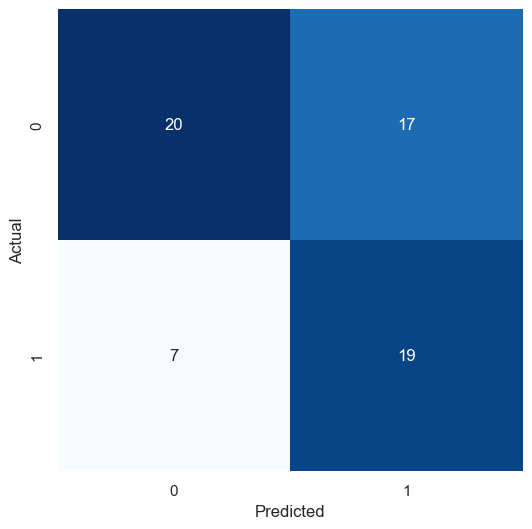

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

plt.figure(figsize=(6,6))
sns.heatmap(cm_gr, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)


Accuracy:  0.6190476190476191
Precision:  0.5277777777777778
Recall:  0.7307692307692307
F1-score:  0.6129032258064515


####### K-Folds CV

In [34]:
# HR data

In [35]:
hr=pd.read_csv("D:/onkar_cdac/C-DAC/PML/PML/Files_by_sir/5. PML/1. Day wise Study Material/Cases/human-resources-analytics/HR_comma_sep.csv")

In [36]:
hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [37]:
dum_hr=pd.get_dummies(hr,drop_first=True)

In [38]:
dum_hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,0,0,0,0,0,0,1,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,0,0,0,0,0,0,0,1,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,0,0,0,0,0,0,0,1,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,0,0,0,0,0,0,0,1,0,1,0


In [39]:
dum_hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department_RandD', 'Department_accounting',
       'Department_hr', 'Department_management', 'Department_marketing',
       'Department_product_mng', 'Department_sales', 'Department_support',
       'Department_technical', 'salary_low', 'salary_medium'],
      dtype='object')

In [40]:
X=dum_hr.drop('left',axis=1)
y=dum_hr['left']

In [41]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2023)
nb = GaussianNB()
results = cross_val_score(nb, X, y, scoring='roc_auc', cv=kfold)
print(results)
print(results.mean())

[0.79827271 0.82153579 0.79873472 0.82941471 0.81590264]
0.8127721128063982


In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [43]:
scaler = StandardScaler()
knn = KNeighborsClassifier()
pipe = Pipeline([('scl_std', scaler), ('knn_model', knn)])

In [44]:
params = {'knn_model__n_neighbors':np.arange(1,31,2)}
gcv = GridSearchCV(pipe, param_grid=params,scoring='roc_auc',
                          cv = kfold)

In [47]:
gcv.fit(X, y)
print(gcv.best_params_)
print(gcv.best_score_)

{'knn_model__n_neighbors': 5}
0.9743328341487165


In [48]:
pd_gcv = pd.DataFrame(gcv.cv_results_)
pd_gcv

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008035,0.003819,0.304683,0.005719,1,{'knn_model__n_neighbors': 1},0.960074,0.971559,0.958693,0.959612,0.963412,0.962670,0.004722,15
1,0.004550,0.005700,0.384755,0.023168,3,{'knn_model__n_neighbors': 3},0.970098,0.978959,0.975812,0.969795,0.975849,0.974103,0.003582,2
2,0.003425,0.006121,0.515756,0.021196,5,{'knn_model__n_neighbors': 5},0.971015,0.977768,0.975356,0.971039,0.976486,0.974333,0.002805,1
3,0.009854,0.004723,0.526967,0.029737,7,{'knn_model__n_neighbors': 7},0.970846,0.977501,0.972572,0.971801,0.974390,0.973422,0.002348,3
4,0.006141,0.005857,0.529293,0.021043,9,{'knn_model__n_neighbors': 9},0.970490,0.976663,0.971643,0.969880,0.973596,0.972454,0.002456,5
5,0.003040,0.003743,0.528028,0.041077,11,{'knn_model__n_neighbors': 11},0.973168,0.975272,0.973089,0.968324,0.973389,0.972648,0.002306,4
6,0.000000,0.000000,0.533186,0.017899,13,{'knn_model__n_neighbors': 13},0.972526,0.974219,0.971890,0.967976,0.972882,0.971898,0.002104,6
7,0.008673,0.005101,0.539389,0.033918,15,{'knn_model__n_neighbors': 15},0.971578,0.973015,0.970161,0.967329,0.972244,0.970865,0.002001,7
8,0.004315,0.004398,0.557666,0.023705,17,{'knn_model__n_neighbors': 17},0.970429,0.971635,0.968760,0.965763,0.972580,0.969833,0.002403,8
9,0.009417,0.005874,0.529942,0.022259,19,{'knn_model__n_neighbors': 19},0.969929,0.970317,0.967588,0.964978,0.971639,0.968890,0.002352,9


In [51]:
####### K-Folds CV with Naive Bayes
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2022)
nb = GaussianNB()
results = cross_val_score(nb, X, y, scoring='neg_log_loss', cv=kfold)
print(results.mean())

-0.7162228345075295


In [52]:
#### on test data
tst_img = pd.read_csv("tst_img.csv")
best_model = gcv.best_estimator_

y_pred = best_model.predict(tst_img)
le.inverse_transform(y_pred)


FileNotFoundError: [Errno 2] No such file or directory: 'tst_img.csv'